## Importando bibliotecas

In [45]:
import tensorflow
from tensorflow import keras

import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

## Importando dataset <ins>fashion mnist</ins>

In [2]:
dataset = keras.datasets.fashion_mnist

((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

In [3]:
imagens_treino

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

---

In [4]:
imagens_treino.shape

(60000, 28, 28)

In [5]:
imagens_teste.shape

(10000, 28, 28)

---

In [6]:
identificacoes_treino.shape

(60000,)

In [7]:
identificacoes_teste.shape

(10000,)

---

## Visualização de imagens

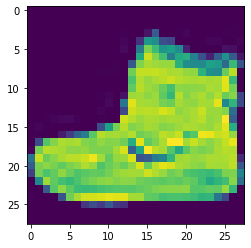

In [8]:
plt.imshow(imagens_treino[0])

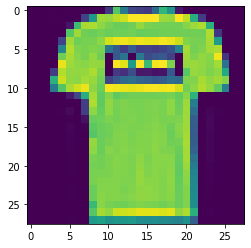

In [9]:
plt.imshow(imagens_treino[1])

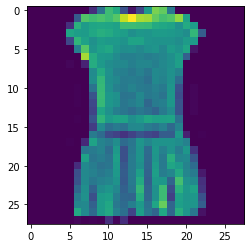

In [10]:
plt.imshow(imagens_treino[3])

## Valores de Identificação das imagens

In [11]:
identificacoes_treino.min()

0

In [12]:
identificacoes_treino.max()

9

In [13]:
total_de_classificacoes = 10

## Criando descrição para cada imagem

In [14]:
identificacoes_description = pd.Series(
    {
        0: 'T-shirt/top',
        1: 'Trouser',
        2: 'Pullover',
        3: 'Dress',
        4: 'Coat',
        5: 'Sandal',
        6: 'Shirt',
        7: 'Sneaker',
        8: 'Bag',
        9: 'Ankle boot'
    }
)

identificacoes_description

0    T-shirt/top
1        Trouser
2       Pullover
3          Dress
4           Coat
5         Sandal
6          Shirt
7        Sneaker
8            Bag
9     Ankle boot
dtype: object

In [15]:
identificacoes_description = identificacoes_description.to_frame()
identificacoes_description.columns = ['Description']
identificacoes_description.index.name = 'Label'

identificacoes_description

,Description
Label,
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag


In [16]:
identificacoes_description.iloc[1]['Description']

'Trouser'

## Visualizando classificações

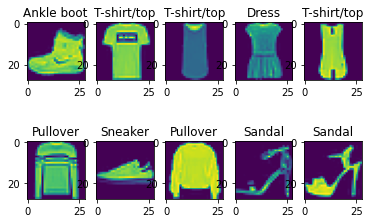

In [17]:
for imagem in range(total_de_classificacoes):
    plt.subplot(2, 5, imagem + 1)
    plt.imshow(imagens_treino[imagem])
    plt.title(identificacoes_description.iloc[identificacoes_treino[imagem]]['Description'])

## Criando a Camada 0 - (camada de entrada)

In [18]:
modelo = keras.Sequential([
    #Achata as dimensoes de entrada pra ser uma só coluna com alturaXlargura
    keras.layers.Flatten(input_shape=(28, 28))
])

## Criando a Camada 1 - (camada Dense)

In [19]:
modelo = keras.Sequential([
    #Achata as dimensoes de entrada pra ser uma só coluna com alturaXlargura
    keras.layers.Flatten(input_shape=(28, 28)),
    
    #Número de "bolinhas" que irão receber os inputs, dica: usar múltiplos de 2 pois o processador trabalha assim
    #activation = função de ativação das "bolinhas", nn -> neural network, relu -> Rectified Linear Unit
    keras.layers.Dense(256, activation=tensorflow.nn.relu)
])

### Relu

<img 
    src="https://miro.medium.com/max/698/1*4YfNyJEGnNhquOIJwLIzMQ.png"
    width=500
/>

- Números negativos na estrada se tornam 0
- Números positivos se mantêm positivos nas saídas
- Não linear
    - As separações das classes acontece por curvas

## Criando a camada 2 (Camada de saída)

In [20]:
modelo = keras.Sequential([
    #Achata as dimensoes de entrada pra ser uma só coluna com alturaXlargura
    keras.layers.Flatten(input_shape=(28, 28)),
    
    #Número de "bolinhas" que irão receber os inputs, dica: usar múltiplos de 2 pois o processador trabalha assim
    #activation = função de ativação das "bolinhas", nn -> neural network, relu -> Rectified Linear Unit
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    
    #A camada de saída também é uma camada Dense
    #A softmax vai forçar a saída representar a probabilidade dos dados serem de uma das classes definidas, 
    #sem ela seriam apenas números onde o maior indicaria a classe vencedora
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

## Compilando o modelo

In [21]:
modelo.compile(
    #Otimizador serve para melhorar o treino
    #adam é um otimizador famoso quando se trada de classificar em categorias
    optimizer='adam',
    
    #Usado no caso de varias categorias (não seria recomendado caso fossem 2 categorias)
    loss='sparse_categorical_crossentropy'
)

## Treinando modelo

In [22]:
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 7s 3ms/step - loss: 3.8583


Podiamos, ainda, ter setado o parâmetro `epochs` para dizer quantas épocas (ciclos) nosso modelo passaria

## Diminuindo perdas

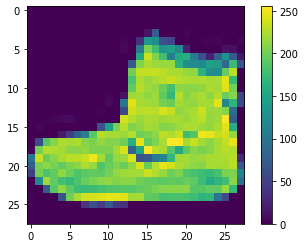

In [23]:
plt.imshow(imagens_treino[0])
plt.colorbar()

### Diminuindo a abrangência numérica

Inicialmente os valores que indicavam as cores iam de 0 a 255, dividir tudo por 255 nos faz manter a diferença entre os valores, agora descritos como pontos flutuantes, e deixar em um intervalo de 0 à 1 (basicamente uma normalização) 

In [24]:
imagens_treino = imagens_treino / float(255)

In [25]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

In [26]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [27]:
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4849


### Redefinindo número de camadas

Até o momento, estávamos usando a seguinte lógica:\
Camada 0 $\rightarrow$ Camada 1 $\rightarrow$ Camada 2\
[(28, 28)] $~\rightarrow~~~$ [256] $~~~\rightarrow$ [10]

Ou seja, temos 256 indo para 10, parece ser muita informação...

Uma possível solução pode ser separar a nossa camada intermediária em mais camadas

In [28]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    
    #As camadas intermediárias são chamadas de ocultas
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4734


---

In [29]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4846


### Treinando por mais épocas

In [30]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4781
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3604
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3243
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3007
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2817


## Como saber acertos por época?

In [31]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

modelo.fit(imagens_treino, identificacoes_treino, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4782 - accuracy: 0.8274
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3625 - accuracy: 0.8666
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3240 - accuracy: 0.8801
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3015 - accuracy: 0.8892
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2824 - accuracy: 0.8943


## Fazendo testes

In [32]:
testes = modelo.predict(imagens_teste)

In [33]:
testes[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [34]:
for i in range(10):
    print(f"Predição do modelo: {np.argmax(testes[i])}")
    print(f"Label do teste: {identificacoes_teste[i]}")
    print("\n")

Predição do modelo: 9
Label do teste: 9


Predição do modelo: 2
Label do teste: 2


Predição do modelo: 1
Label do teste: 1


Predição do modelo: 1
Label do teste: 1


Predição do modelo: 6
Label do teste: 6


Predição do modelo: 1
Label do teste: 1


Predição do modelo: 4
Label do teste: 4


Predição do modelo: 6
Label do teste: 6


Predição do modelo: 5
Label do teste: 5


Predição do modelo: 7
Label do teste: 7




In [35]:
def num_to_description(num):
    if num > 10 or num < 0:
        return -1
    else:
        return identificacoes_description.iloc[num]['Description']

In [36]:
for i in range(10):
    print(f"Predição do modelo: {num_to_description(np.argmax(testes[i]))}")
    print(f"Label do teste: {num_to_description(identificacoes_teste[i])}")
    print("\n")

Predição do modelo: Ankle boot
Label do teste: Ankle boot


Predição do modelo: Pullover
Label do teste: Pullover


Predição do modelo: Trouser
Label do teste: Trouser


Predição do modelo: Trouser
Label do teste: Trouser


Predição do modelo: Shirt
Label do teste: Shirt


Predição do modelo: Trouser
Label do teste: Trouser


Predição do modelo: Coat
Label do teste: Coat


Predição do modelo: Shirt
Label do teste: Shirt


Predição do modelo: Sandal
Label do teste: Sandal


Predição do modelo: Sneaker
Label do teste: Sneaker




## Avaliação do modelo

In [37]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

313/313 [==============================] - 1s 3ms/step - loss: 47.2737 - accuracy: 0.8656


In [38]:
print(f"Perdas do teste: {perda_teste}")
print(f"Acurácia do teste: {acuracia_teste}")

Perdas do teste: 47.27368927001953
Acurácia do teste: 0.8655999898910522


## Validação

In [39]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4936 - accuracy: 0.8232 - val_loss: 0.4196 - val_accuracy: 0.8454
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3702 - accuracy: 0.8650 - val_loss: 0.3654 - val_accuracy: 0.8672
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3321 - accuracy: 0.8779 - val_loss: 0.3641 - val_accuracy: 0.8702
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3071 - accuracy: 0.8850 - val_loss: 0.3452 - val_accuracy: 0.8781
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2901 - accuracy: 0.8910 - val_loss: 0.3200 - val_accuracy: 0.8819


- val_loss: perda da validação
- val_accuracy: perda da acurácia

In [40]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2739 - accuracy: 0.8969 - val_loss: 0.3520 - val_accuracy: 0.8746
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2609 - accuracy: 0.9021 - val_loss: 0.3228 - val_accuracy: 0.8854
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2482 - accuracy: 0.9059 - val_loss: 0.3204 - val_accuracy: 0.8878
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2379 - accuracy: 0.9108 - val_loss: 0.3144 - val_accuracy: 0.8923
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2275 - accuracy: 0.9135 - val_loss: 0.3389 - val_accuracy: 0.8832


In [41]:
historico.history

{'loss': [0.2739444673061371,
  0.26093706488609314,
  0.2481810301542282,
  0.2379201501607895,
  0.22747544944286346],
 'accuracy': [0.8969166874885559,
  0.9021458625793457,
  0.9058958292007446,
  0.9107916951179504,
  0.9134583473205566],
 'val_loss': [0.35201558470726013,
  0.32277774810791016,
  0.32043299078941345,
  0.31437379121780396,
  0.3389138877391815],
 'val_accuracy': [0.8745833039283752,
  0.8854166865348816,
  0.8877500295639038,
  0.8922500014305115,
  0.8831666707992554]}

In [46]:
df_historico = pd.DataFrame(historico.history)

df_historico

,loss,accuracy,val_loss,val_accuracy
0,0.273944,0.896917,0.352016,0.874583
1,0.260937,0.902146,0.322778,0.885417
2,0.248181,0.905896,0.320433,0.887750
3,0.237920,0.910792,0.314374,0.892250
4,0.227475,0.913458,0.338914,0.883167


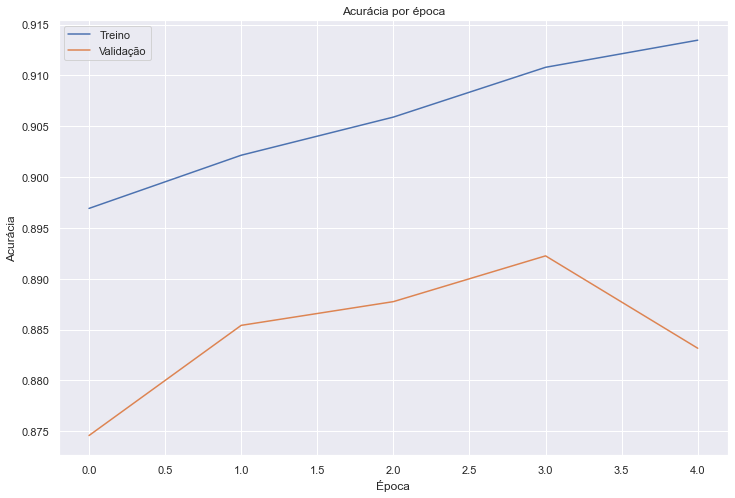

In [61]:
sns.set_theme()
plt.figure(figsize=(12, 8))

sns.lineplot(data=df_historico, x=df_historico.index.values, y='accuracy')
sns.lineplot(data=df_historico, x=df_historico.index.values, y='val_accuracy')

plt.title('Acurácia por época')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'])

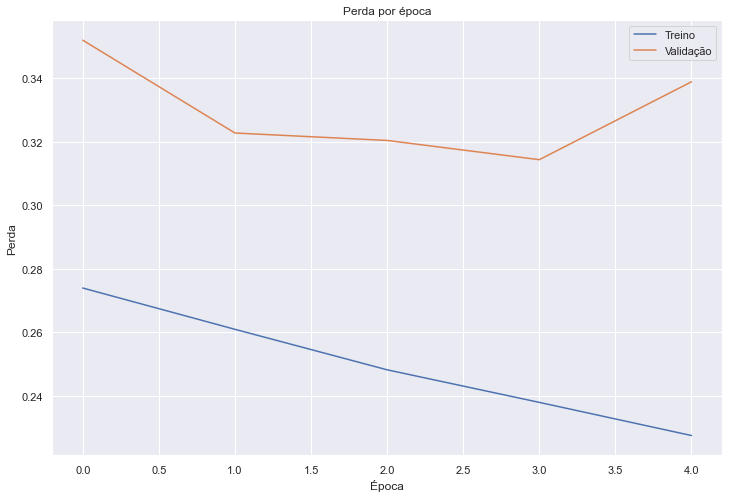

In [62]:
sns.set_theme()
plt.figure(figsize=(12, 8))

sns.lineplot(data=df_historico, x=df_historico.index.values, y='loss')
sns.lineplot(data=df_historico, x=df_historico.index.values, y='val_loss')

plt.title('Perda por época')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'])

In [63]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2201 - accuracy: 0.9164 - val_loss: 0.3254 - val_accuracy: 0.8916
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2098 - accuracy: 0.9212 - val_loss: 0.3343 - val_accuracy: 0.8886
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2005 - accuracy: 0.9233 - val_loss: 0.3609 - val_accuracy: 0.8802
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1935 - accuracy: 0.9273 - val_loss: 0.3404 - val_accuracy: 0.8941
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1900 - accuracy: 0.9282 - val_loss: 0.3770 - val_accuracy: 0.8870
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1840 - accuracy: 0.9298 - val_loss: 0.3448 - val_accuracy: 0.8897
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1788 - accuracy: 0.9310 - val_loss: 0.3546 - val_accuracy:

In [64]:
df_historico = pd.DataFrame(historico.history)

df_historico

,loss,accuracy,val_loss,val_accuracy
0,0.220080,0.916354,0.325430,0.891583
1,0.209793,0.921188,0.334321,0.888583
2,0.200534,0.923292,0.360936,0.880167
3,0.193532,0.927250,0.340431,0.894083
4,0.190009,0.928187,0.376955,0.887000
5,0.183986,0.929750,0.344808,0.889667
6,0.178812,0.931021,0.354602,0.890250
7,0.169472,0.935750,0.390266,0.888000
8,0.168625,0.935792,0.368940,0.891750
9,0.162057,0.938146,0.369137,0.886833


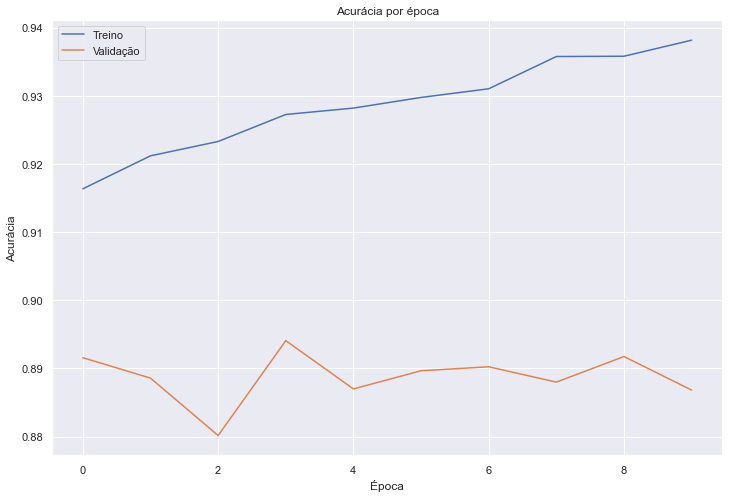

In [65]:
sns.set_theme()
plt.figure(figsize=(12, 8))

sns.lineplot(data=df_historico, x=df_historico.index.values, y='accuracy')
sns.lineplot(data=df_historico, x=df_historico.index.values, y='val_accuracy')

plt.title('Acurácia por época')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'])

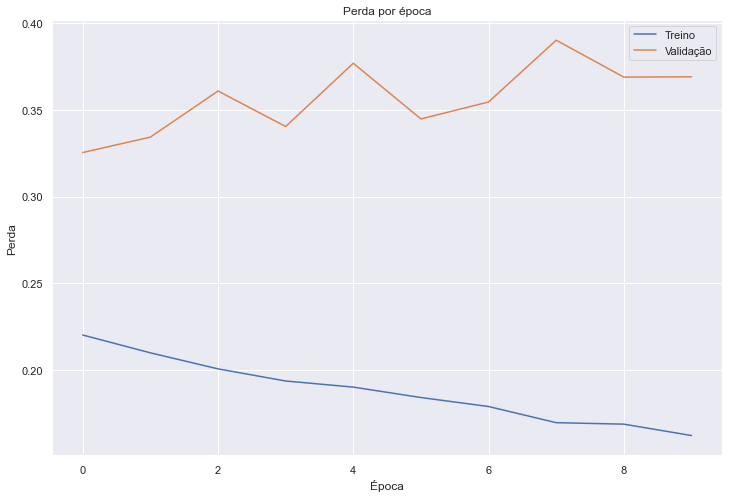

In [66]:
sns.set_theme()
plt.figure(figsize=(12, 8))

sns.lineplot(data=df_historico, x=df_historico.index.values, y='loss')
sns.lineplot(data=df_historico, x=df_historico.index.values, y='val_loss')

plt.title('Perda por época')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'])

O modelo está se adaptando demais ao treino $\rightarrow$ `overfitting`

A idéia é analisar pelo gráfico e colocar a melhor época

Outra idéia de diminuir as chances de overfitting é a técnica de `dropout`

In [68]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    #Porcentagem de "bolinhas" adormecidas
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

df_historico = pd.DataFrame(historico.history)

df_historico

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5259 - accuracy: 0.8095 - val_loss: 0.4188 - val_accuracy: 0.8537
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4053 - accuracy: 0.8508 - val_loss: 0.3672 - val_accuracy: 0.8708
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3653 - accuracy: 0.8678 - val_loss: 0.3662 - val_accuracy: 0.8662
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3422 - accuracy: 0.8729 - val_loss: 0.3385 - val_accuracy: 0.8767
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3272 - accuracy: 0.8781 - val_loss: 0.3552 - val_accuracy: 0.8666


,loss,accuracy,val_loss,val_accuracy
0,0.525913,0.809500,0.418763,0.853750
1,0.405308,0.850792,0.367182,0.870833
2,0.365257,0.867771,0.366152,0.866167
3,0.342242,0.872917,0.338464,0.876667
4,0.327243,0.878146,0.355209,0.866583


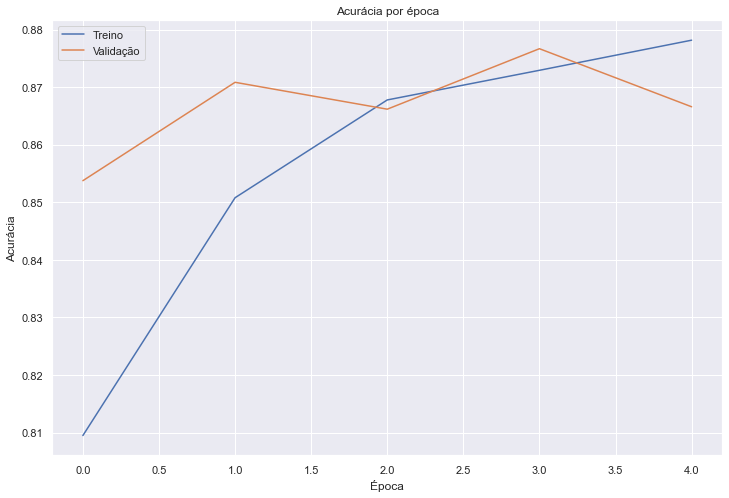

In [69]:
sns.set_theme()
plt.figure(figsize=(12, 8))

sns.lineplot(data=df_historico, x=df_historico.index.values, y='accuracy')
sns.lineplot(data=df_historico, x=df_historico.index.values, y='val_accuracy')

plt.title('Acurácia por época')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'])

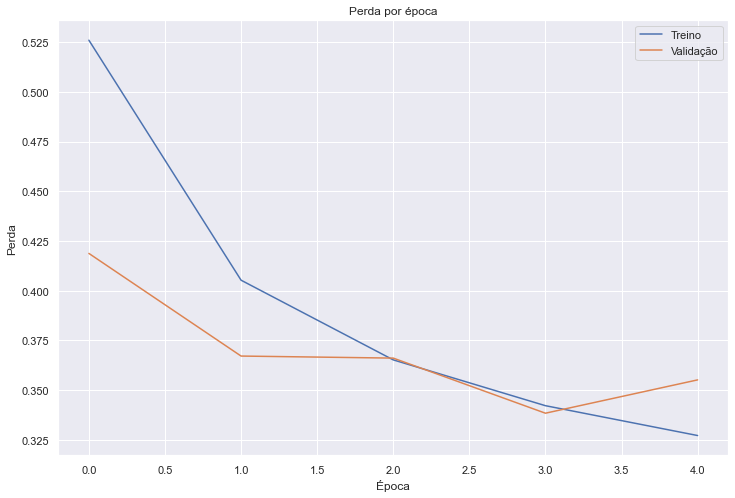

In [70]:
sns.set_theme()
plt.figure(figsize=(12, 8))

sns.lineplot(data=df_historico, x=df_historico.index.values, y='loss')
sns.lineplot(data=df_historico, x=df_historico.index.values, y='val_loss')

plt.title('Perda por época')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'])

In [71]:
modelo.save('modelo.h5')

In [72]:
modelo_salvo = keras.models.load_model('modelo.h5')

In [73]:
modelo_salvo.predict(imagens_teste)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)